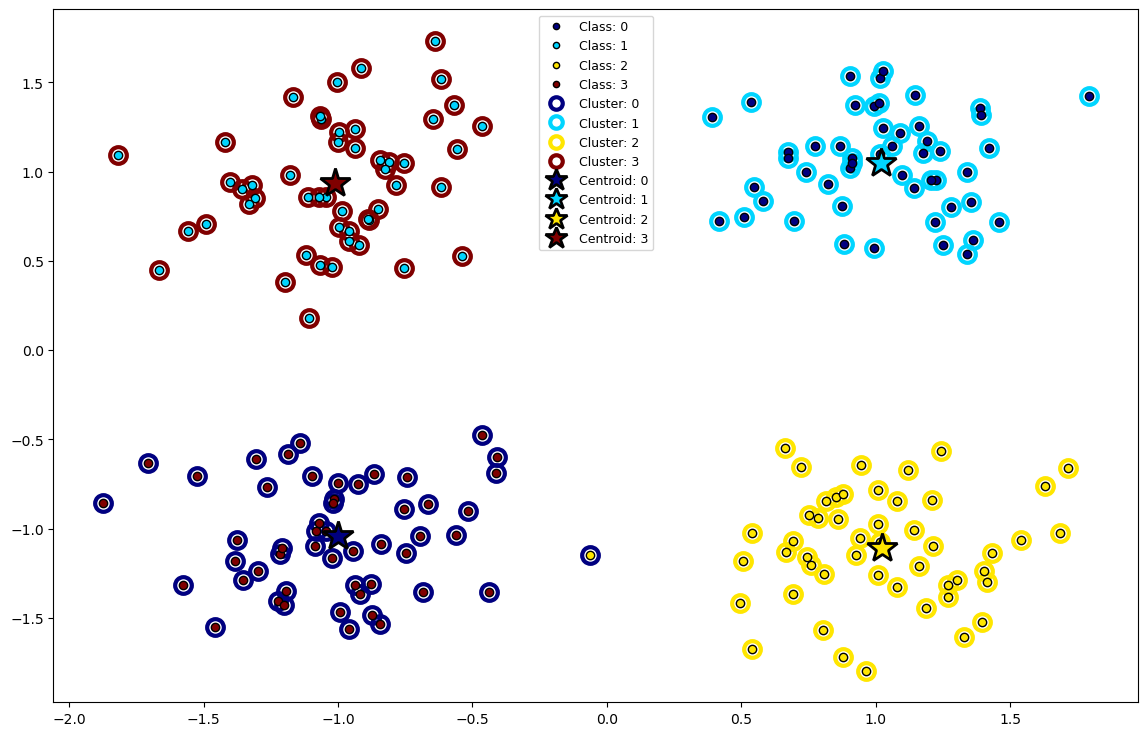

In [ ]:
import importlib_resources
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import k_means

from dtuimldmtools import clusterplot

filename = importlib_resources.files("dtuimldmtools").joinpath("data/synth1.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"].squeeze()]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)

# Number of clusters:
K = 4

# K-means clustering:
#inertia : float
# The final value of the inertia criterion (sum of squared distances to the closest centroid for all observations in the training set).


centroids, cls, inertia = k_means(X, K)

# Plot results:
plt.figure(figsize=(14, 9))
clusterplot(X, cls, centroids, y)
plt.show()

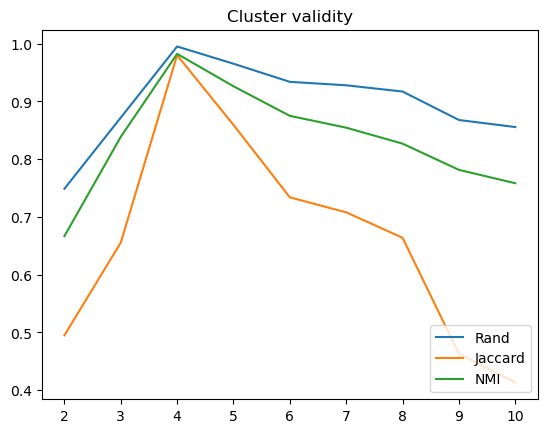

Ran Exercise 10.1.3


In [2]:
# exercise 10.1.3
import importlib_resources
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import k_means

from dtuimldmtools import clusterval

filename = importlib_resources.files("dtuimldmtools").joinpath("data/synth1.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"].squeeze()]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)

# Maximum number of clusters:
K = 10

# Allocate variables:
Rand = np.zeros((K - 1,))
Jaccard = np.zeros((K - 1,))
NMI = np.zeros((K - 1,))

for k in range(K - 1):
    # run K-means clustering:
    # cls = Pycluster.kcluster(X,k+1)[0]
    centroids, cls, inertia = k_means(X, k + 2)
    # compute cluster validities:
    Rand[k], Jaccard[k], NMI[k] = clusterval(y, cls)

# Plot results:

plt.figure(1)
plt.title("Cluster validity")
plt.plot(np.arange(K - 1) + 2, Rand)
plt.plot(np.arange(K - 1) + 2, Jaccard)
plt.plot(np.arange(K - 1) + 2, NMI)
plt.legend(["Rand", "Jaccard", "NMI"], loc=4)
plt.show()

print("Ran Exercise 10.1.3")

As we increase the number of clusters 
𝑘
k:

The training error will decrease monotonically, approaching 0 as 
𝑘
k approaches the number of training points.
The test error will decrease initially as the clusters better capture the data’s structure, but then increase as 
𝑘
k becomes too large, due to overfitting to the training data.
This reflects the typical pattern of model complexity in machine learning: the training error keeps improving, but the test error shows a U-shaped curve, decreasing to a minimum before increasing due to overfitting.

## Clustering for image compression

Initialization complete
Iteration 0, inertia 294586.4236380731.
Iteration 1, inertia 175426.74340207208.
Iteration 2, inertia 171678.80608941184.
Iteration 3, inertia 170622.94706695626.
Iteration 4, inertia 170172.59544724156.
Iteration 5, inertia 169976.30814003936.
Iteration 6, inertia 169867.95554987114.
Iteration 7, inertia 169838.12663062793.
Iteration 8, inertia 169798.41814529616.
Iteration 9, inertia 169775.28258516005.
Iteration 10, inertia 169750.61618046733.
Iteration 11, inertia 169733.73873913876.
Iteration 12, inertia 169730.5677156185.
Converged at iteration 12: strict convergence.


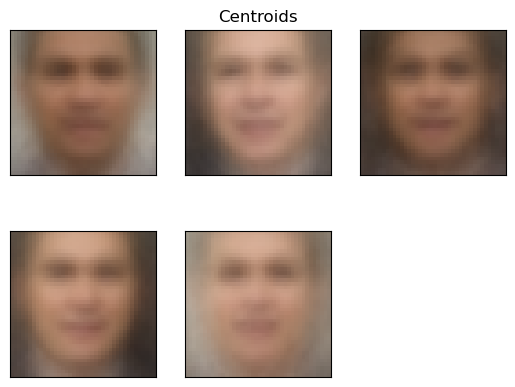

In [7]:
# exercise 10_1_5
import importlib_resources
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import k_means

filename = importlib_resources.files("dtuimldmtools").joinpath("data/wildfaces.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)

# filename = importlib_resources.files("dtuimldmtools").joinpath("data/digits.mat") #<-- uncomment this for using the digits dataset

X = mat_data["X"]
N, M = X.shape

# Image resolution and number of colors
x = 40  # <-- change this for using the digits dataset
y = 40  # <-- change this for using the digits dataset
c = 3  # <-- change this for using the digits dataset

# Number of clusters:
K = 5

# Number of repetitions with different initial centroid seeds
S = 1

# Run k-means clustering:
centroids, cls, inertia = k_means(X, K, verbose=True, max_iter=100, n_init=S)


# Plot results:

# Plot centroids
plt.figure(1)
n1 = int(np.ceil(np.sqrt(K / 2)))
n2 = int(np.ceil(float(K) / n1))

# For black and white, cmap=plt.cm.binary, else default
cmap = plt.cm.binary if c == 1 else None

for k in range(K):
    plt.subplot(n1, n2, k + 1)
    # Reshape centroids to fit resolution and colors
    img = np.reshape(centroids[k, :], (c, x, y)).T
    if c == 1:  # if color is single-color/gray scale
        # Squeeze out singleton dimension
        # and flip the image (cancel out previos transpose)
        img = np.squeeze(img).T
    plt.imshow(img, interpolation="None", cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    if k == np.floor((n2 - 1) / 2):
        plt.title("Centroids")
plt.show()

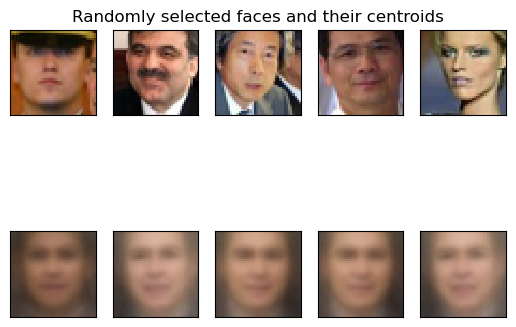

In [8]:
# Plot few randomly selected faces and their nearest centroids
L = 5  # number of images to plot
j = np.random.randint(0, N, L)
plt.figure(2)
for l in range(L):
    plt.subplot(2, L, l + 1)
    img = np.resize(X[j[l], :], (c, x, y)).T
    if c == 1:
        img = np.squeeze(img).T
    plt.imshow(img, interpolation="None", cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    if l == np.floor((L - 1) / 2):
        plt.title("Randomly selected faces and their centroids")
    plt.subplot(2, L, L + l + 1)
    img = np.resize(centroids[cls[j[l]], :], (c, x, y)).T
    if c == 1:
        img = np.squeeze(img).T
    plt.imshow(img, interpolation="None", cmap=cmap)
    plt.xticks([])
    plt.yticks([])
plt.show()

Initialization complete
Iteration 0, inertia 1137303.8572639998.
Iteration 1, inertia 748609.415489529.
Iteration 2, inertia 731222.1967848653.
Iteration 3, inertia 724514.7336012059.
Iteration 4, inertia 721966.1211975708.
Iteration 5, inertia 721048.7570278061.
Iteration 6, inertia 720724.4919428774.
Iteration 7, inertia 720568.8616467443.
Iteration 8, inertia 720517.6779590354.
Iteration 9, inertia 720497.3702648991.
Iteration 10, inertia 720482.4805968008.
Iteration 11, inertia 720475.6392700837.
Iteration 12, inertia 720467.755907887.
Iteration 13, inertia 720460.10409715.
Iteration 14, inertia 720454.1777102812.
Iteration 15, inertia 720447.2455170207.
Iteration 16, inertia 720444.8806768584.
Iteration 17, inertia 720442.236841562.
Iteration 18, inertia 720440.3481708918.
Iteration 19, inertia 720438.3495017379.
Iteration 20, inertia 720436.6701630459.
Iteration 21, inertia 720436.1626363386.
Iteration 22, inertia 720434.7820013828.
Iteration 23, inertia 720431.0700848616.
Iterat

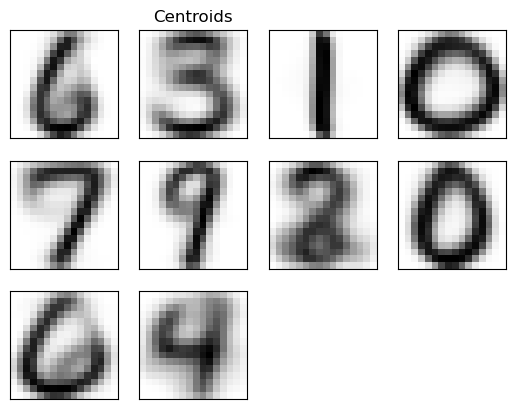

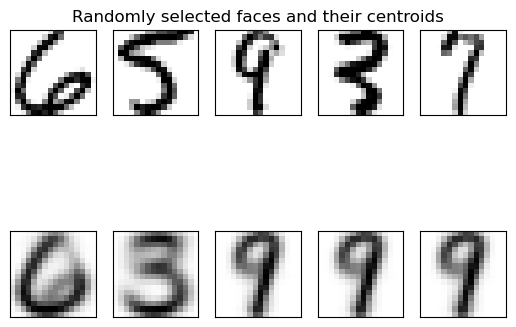

Ran Exercise 10.1.5


In [10]:
# exercise 10_1_5
import importlib_resources
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import k_means

# filename = importlib_resources.files("dtuimldmtools").joinpath("data/wildfaces.mat")

filename = importlib_resources.files("dtuimldmtools").joinpath("data/digits.mat") #<-- uncomment this for using the digits dataset
# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)


X = mat_data["X"]
N, M = X.shape

# Image resolution and number of colors
x = 16  # <-- change this for using the digits dataset
y = 16  # <-- change this for using the digits dataset
c = 1  # <-- change this for using the digits dataset

# Number of clusters:
K = 10

# Number of repetitions with different initial centroid seeds
S = 1

# Run k-means clustering:
centroids, cls, inertia = k_means(X, K, verbose=True, max_iter=100, n_init=S)


# Plot results:

# Plot centroids
plt.figure(1)
n1 = int(np.ceil(np.sqrt(K / 2)))
n2 = int(np.ceil(float(K) / n1))

# For black and white, cmap=plt.cm.binary, else default
cmap = plt.cm.binary if c == 1 else None

for k in range(K):
    plt.subplot(n1, n2, k + 1)
    # Reshape centroids to fit resolution and colors
    img = np.reshape(centroids[k, :], (c, x, y)).T
    if c == 1:  # if color is single-color/gray scale
        # Squeeze out singleton dimension
        # and flip the image (cancel out previos transpose)
        img = np.squeeze(img).T
    plt.imshow(img, interpolation="None", cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    if k == np.floor((n2 - 1) / 2):
        plt.title("Centroids")

# Plot few randomly selected faces and their nearest centroids
L = 5  # number of images to plot
j = np.random.randint(0, N, L)
plt.figure(2)
for l in range(L):
    plt.subplot(2, L, l + 1)
    img = np.resize(X[j[l], :], (c, x, y)).T
    if c == 1:
        img = np.squeeze(img).T
    plt.imshow(img, interpolation="None", cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    if l == np.floor((L - 1) / 2):
        plt.title("Randomly selected faces and their centroids")
    plt.subplot(2, L, L + l + 1)
    img = np.resize(centroids[cls[j[l]], :], (c, x, y)).T
    if c == 1:
        img = np.squeeze(img).T
    plt.imshow(img, interpolation="None", cmap=cmap)
    plt.xticks([])
    plt.yticks([])

plt.show()

print("Ran Exercise 10.1.5")

## Hierachical clustering

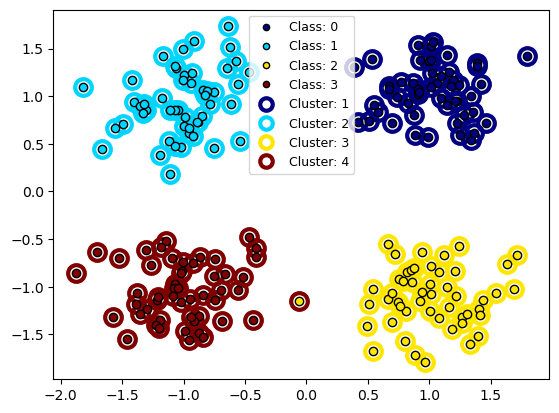

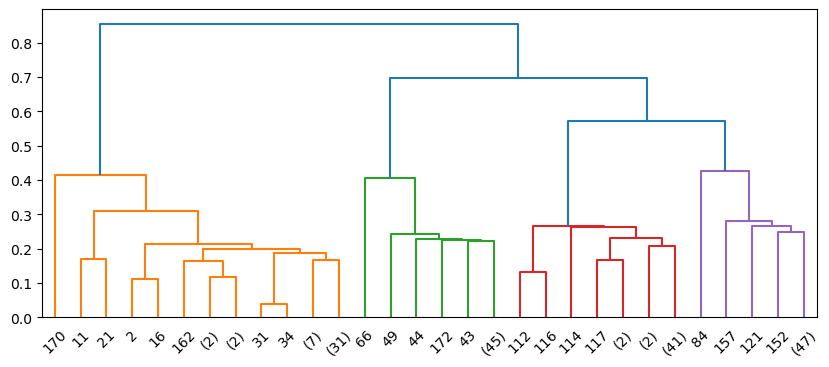

In [11]:
# exercise 10.2.1
import importlib_resources
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from scipy.io import loadmat

from dtuimldmtools import clusterplot

filename = importlib_resources.files("dtuimldmtools").joinpath("data/synth1.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"].squeeze()]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)


# Perform hierarchical/agglomerative clustering on data matrix
Method = "single"
Metric = "euclidean"

Z = linkage(X, method=Method, metric=Metric)

# Compute and display clusters by thresholding the dendrogram
Maxclust = 4
cls = fcluster(Z, criterion="maxclust", t=Maxclust)
plt.figure(1)
clusterplot(X, cls.reshape(cls.shape[0], 1), y=y)

# Display dendrogram
max_display_levels = 6
plt.figure(2, figsize=(10, 4))
dendrogram(
    Z, truncate_mode="level", p=max_display_levels, color_threshold=Z[-Maxclust + 1, 2]
)

plt.show()

## geyser

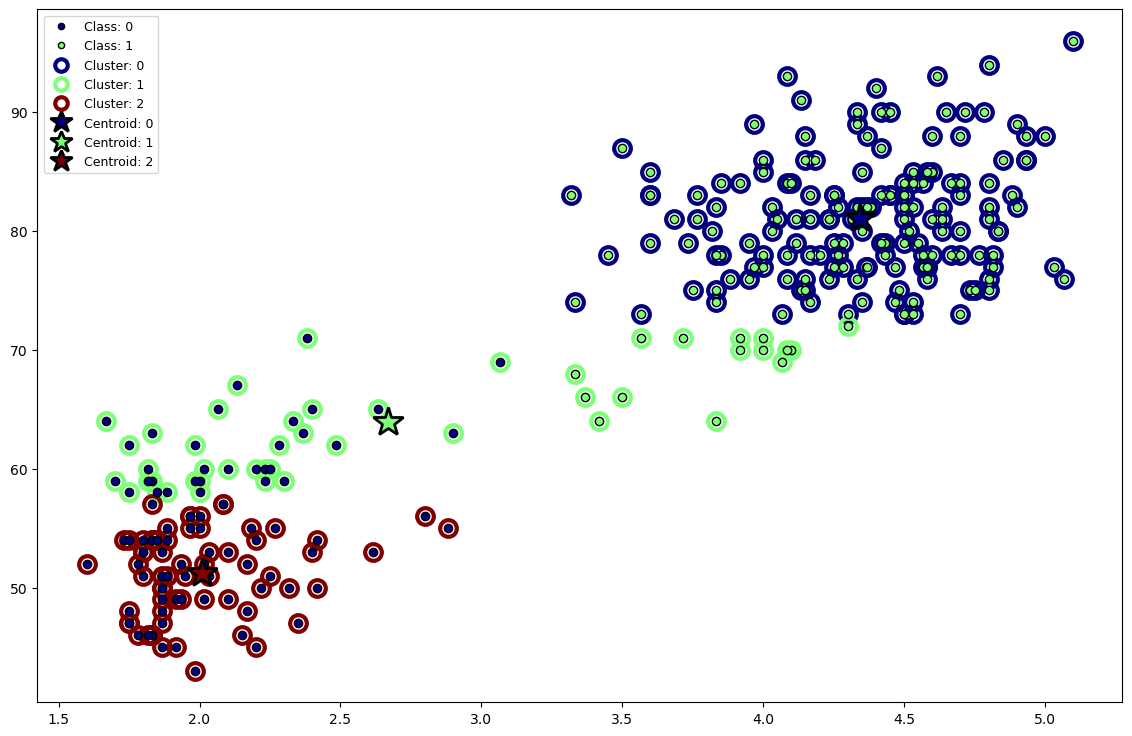

In [13]:
import importlib_resources
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import k_means

from dtuimldmtools import clusterplot

filename = importlib_resources.files("dtuimldmtools").joinpath("data/faithful.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"].squeeze()]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)

# Number of clusters:
K = 3

# K-means clustering:
# inertia : float
# The final value of the inertia criterion (sum of squared distances to the closest centroid for all observations in the training set).


centroids, cls, inertia = k_means(X, K)

# Plot results:
plt.figure(figsize=(14, 9))
clusterplot(X, cls, centroids, y)
plt.show()

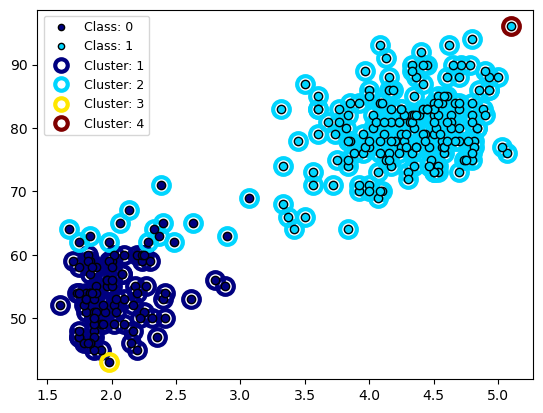

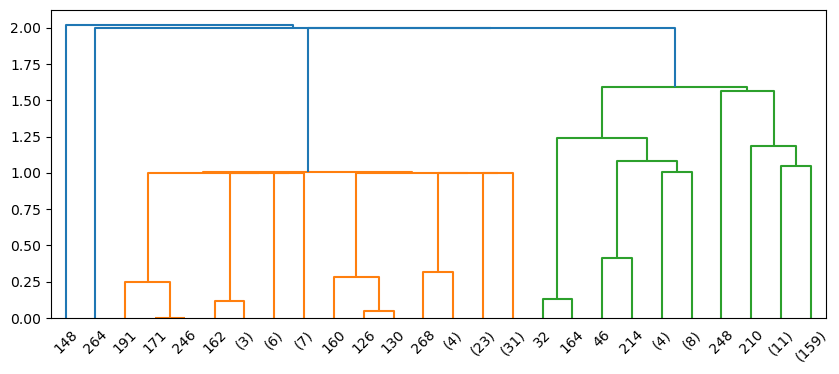

In [15]:
# exercise 10.2.1
import importlib_resources
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from scipy.io import loadmat

from dtuimldmtools import clusterplot

filename = importlib_resources.files("dtuimldmtools").joinpath("data/faithful.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"].squeeze()]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)


# Perform hierarchical/agglomerative clustering on data matrix
Method = "single"
Metric = "euclidean"

Z = linkage(X, method=Method, metric=Metric)

# Compute and display clusters by thresholding the dendrogram
Maxclust = 4
cls = fcluster(Z, criterion="maxclust", t=Maxclust)
plt.figure(1)
clusterplot(X, cls.reshape(cls.shape[0], 1), y=y)

# Display dendrogram
max_display_levels = 6
plt.figure(2, figsize=(10, 4))
dendrogram(
    Z, truncate_mode="level", p=max_display_levels, color_threshold=Z[-Maxclust + 1, 2]
)

plt.show()

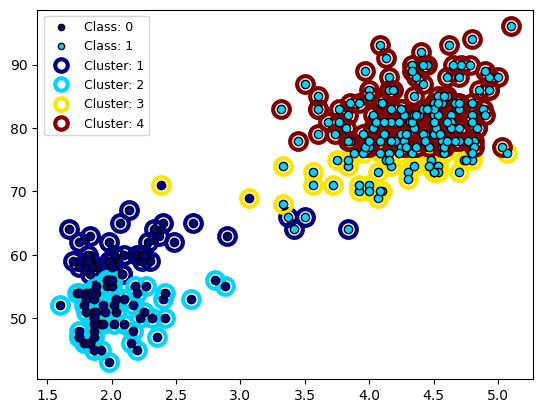

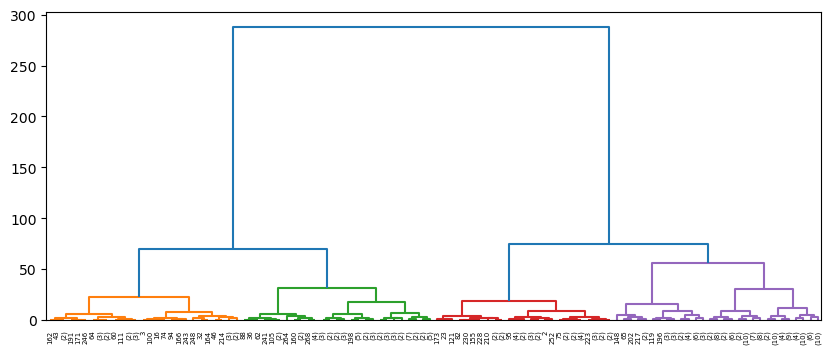

In [17]:
# exercise 10.2.1
import importlib_resources
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from scipy.io import loadmat

from dtuimldmtools import clusterplot

filename = importlib_resources.files("dtuimldmtools").joinpath("data/faithful.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"].squeeze()]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)


# Perform hierarchical/agglomerative clustering on data matrix
Method = "ward"
Metric = "euclidean"

Z = linkage(X, method=Method, metric=Metric)

# Compute and display clusters by thresholding the dendrogram
Maxclust = 4
cls = fcluster(Z, criterion="maxclust", t=Maxclust)
plt.figure(1)
clusterplot(X, cls.reshape(cls.shape[0], 1), y=y)

# Display dendrogram
max_display_levels = 6
plt.figure(2, figsize=(10, 4))
dendrogram(
    Z, truncate_mode="level", p=max_display_levels, color_threshold=Z[-Maxclust + 1, 2]
)

plt.show()